In [1]:
pip install lightKurve

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\carlo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np

LET'S LOOK AT A STAR WE KNOW THAT HAS A PLANET

If we can spot a blob periodically transiting between the star and us, chances are it's an exoplanet

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11958'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

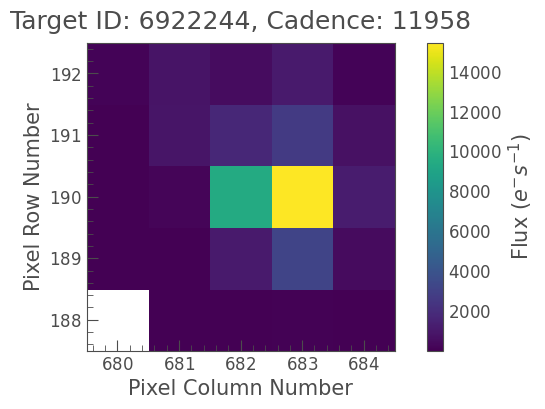

In [10]:
#Download the pixelfile for a given star
#A quarter means a quarter of a year
pixelFile = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter="4").download()

#Show a single snapshot
pixelFile.plot(frame=42)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

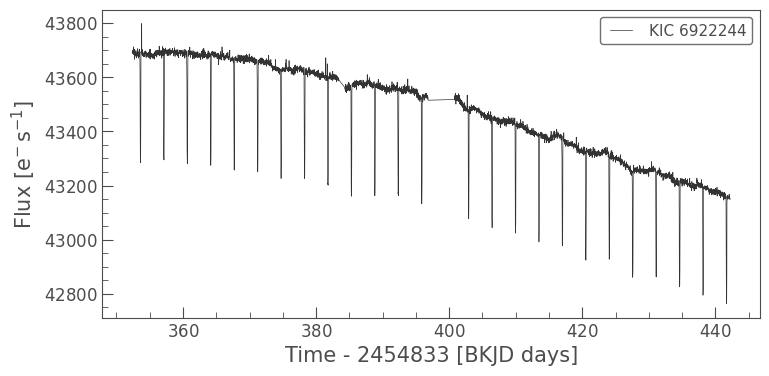

In [11]:
# We'll combine the individual frames into a lightcurve
#Aperture masks make the image look better for analysis
lc = pixelFile.to_lightcurve(aperture_mask = pixelFile.pipeline_mask)
lc.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

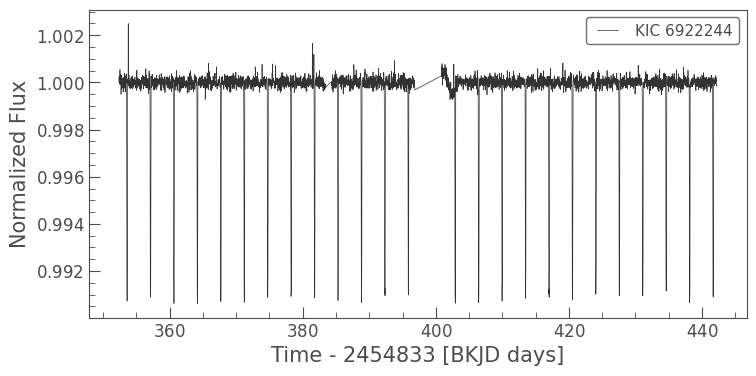

In [12]:
# We may find it easier to spot the pattern if we flatten the curve
flat_lc = lc.flatten()
flat_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

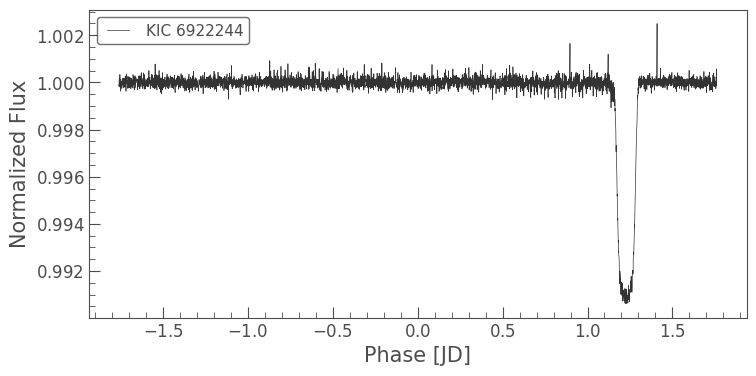

In [13]:
# Phase-fold the light curve to verify that the period and trasist time correspond to the transist signal
# This puts the frequency spikes on top of each other if we get the period right
folded_lc = flat_lc.fold(period= 3.5225)
folded_lc.plot()

In [14]:
# How to discover the correct period?
# Use a perodogram to the trasist signal
# This puts the frequency spikes on top of each other if we get the period right

# Periodograms are an estimate of the spectral density of a signal
# (An estimation of what the Fourier Transform of the data would look like if it were a continous function)

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

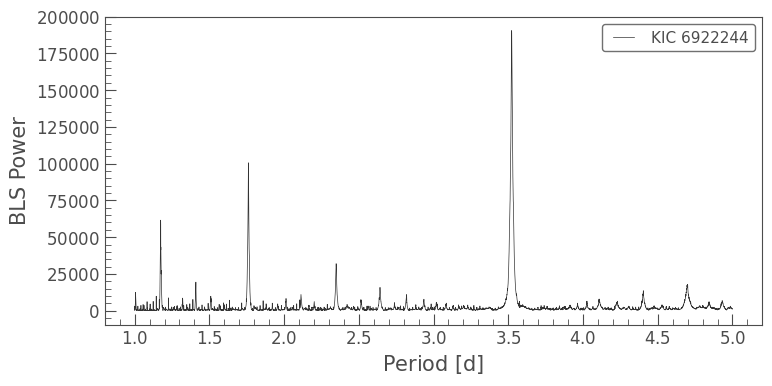

In [15]:
period = np.linspace(1, 5, 10000)
# BLS = Box Least Squares
bls = lc.to_periodogram(method='bls', period = period, frequency_factor=500)
bls.plot()

3.522652265226523 d
353.60132485035285
0.1 d


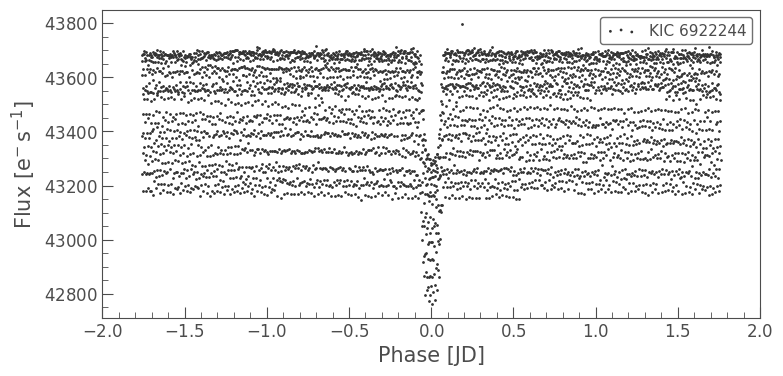

In [17]:
# Period value corresponding to the highest peak in the periodogram
planet_x_period = bls.period_at_max_power

planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Folding can yield a lot of information about the planet
# The depth can tell you about the size, etc
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-2, 2)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)

LET'S TRY AND FIND A PLANET

Pick a star and try to see if there's something transiting in front of it

SELECTING A STAR

In [ ]:
# Use TESS data. That's being updated regularly. Kepler is already well analysed

# Downloading MAST data

# Look for nearby stars
# MAST catalogs -> TESS CTL v8.01 -> Avanced Search
# Has 9.5 million records

# Narrow down the search as you like

# For example:
# T_eff = Temperature between 2000 and 3500
#         These are red dwarf and tend to have rapidly orbiting planets
#         Which fits the 24 day time sampling rate of TESS

# Distance = Between 12 and 24 parsecs
#            Because we are not able to do the Kessel run in less than 12

# Take the ID, e.g. 140206488

# Double-check in EXOMAST to see if a planet has already been found

# Put the name in MAST search and find TESS data
# We can try to access this with search_targetpixelfile
# Or download the data to a local folder.

ANALIZE THE STAR

In [1]:
# let's download the pixelfile for a given star
# and save it to al local folder (See download helper below)